In [28]:
import os
import pymysql
import pandas as pd
import numpy as np
import math
from collections import Counter
import mysql.connector
import matplotlib
from matplotlib import pyplot as plt
import datetime
%matplotlib inline

In [89]:
mydb = mysql.connector.connect(
 host="35.226.144.150",
 user="root",
 passwd="Arun@172000",
 database="water_monetering"
)

print(mydb)

DatabaseError: 2003 (HY000): Can't connect to MySQL server on '35.226.144.150' (10061)

In [2]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM watertank_monitering")
for x in cursor:
    print(x)

NameError: name 'mydb' is not defined

In [56]:
df = pd.read_sql_query("select * from watertank_monitering",mydb)
print(df.head)

<bound method NDFrame.head of    s_no           date_time water_level pH_level turbidity
0     1 2019-08-16 17:50:00       100.5        6       500
1     2 2019-08-19 14:12:36       150.5        7       500>


In [3]:
df = pd.read_csv(r"C:\Users\user\Desktop\Vimalan\Water Tank\TankData (6).csv")
df.head()

,SNO,Volume,WaterLevel,Time
0,74512,28451.7,54.32,14:00:16
1,74513,28332.2,54.94,14:01:17
2,74514,28391.9,54.63,14:02:18
3,74515,28295.6,55.12,14:03:18
4,74516,28295.6,55.12,14:04:19


In [4]:
#sorting in ascending order
df.sort_values(["Volume"], axis=0, 
                 ascending=True, inplace=True) 


In [5]:
df = df.dropna()

In [6]:
#no of values in the dataset
df.count()

SNO           53
Volume        53
WaterLevel    53
Time          53
dtype: int64

In [7]:
#storing count() in a variable
a=df.count()

In [8]:
print(float(a[1]))
a=float(a[1])

53.0


In [9]:
#finding square root for total no of recors present in dataset
math.sqrt(a)

7.280109889280518

In [10]:
#storing square root value in K
k=math.sqrt(a)
print(k)
d=round(k)
print(d)

7.280109889280518
7


In [11]:
#max value in the dataset
max_val=df.max()
print(max_val[1])

28451.7


In [12]:
#min value in the dataset
min_val=df.min()
print(min_val[1])
m=min_val[1]
print(m)

26569.1
26569.1


In [13]:
#finding interval
interval= float(max_val[1]-min_val[1])/d

In [14]:
print(interval)

268.94285714285746


In [15]:
x = round(interval)
print(x)

269


In [16]:
m = int(m)

In [17]:
def create_bins(lower_bound, width, quantity):
 
    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [18]:
bins = create_bins(lower_bound=m,
                   width=x,
                   quantity=d)

In [19]:
s= bins
s

[(26569, 26838),
 (26838, 27107),
 (27107, 27376),
 (27376, 27645),
 (27645, 27914),
 (27914, 28183),
 (28183, 28452),
 (28452, 28721)]

In [20]:
add=list()
for i in bins:
    add.append(int(i[0]+i[1]))

In [21]:
add

[53407, 53945, 54483, 55021, 55559, 56097, 56635, 57173]

In [22]:
mid=list()
for i in add:
    mid.append(i/2)

In [23]:
mid

[26703.5, 26972.5, 27241.5, 27510.5, 27779.5, 28048.5, 28317.5, 28586.5]

In [31]:
mean = list()
for i in range(0,len(mid),2):
    mean.append((mid[i]+mid[i+1])/2)

In [32]:
mean

[26838.0, 27376.0, 27914.0, 28452.0]

ValueError: x and y must have same first dimension, but have shapes (53,) and (4,)

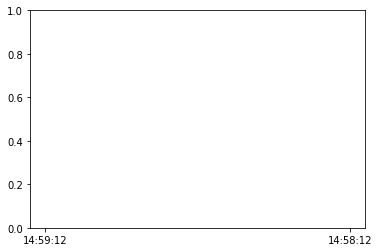

In [38]:
plt.plot(df['Time'],mean,i)
plt.show()

In [49]:
x= datetime.datetime.now()
y = x + datetime.timedelta(0,900)
print(x.time())
print(y.time())

16:40:53.982279
16:55:53.982279


In [160]:
for x in df['Time']:
    date_time_obj = datetime.datetime.strptime(x, '%H:%M:%S')
    Time.append(date_time_obj.time())

In [180]:
T = [Time[0:6],Time[6:13],Time[13:20],Time[20:27], Time[27:34],Time[34:41],Time[41:48],Time[48:56],Time[56:57]]
T

[[datetime.time(10, 20, 55),
  datetime.time(10, 21, 55),
  datetime.time(10, 22, 56),
  datetime.time(10, 23, 57),
  datetime.time(10, 24, 57),
  datetime.time(10, 25, 58)],
 [datetime.time(10, 26, 58),
  datetime.time(10, 29, 4),
  datetime.time(10, 30, 4),
  datetime.time(10, 31, 5),
  datetime.time(10, 32, 5),
  datetime.time(10, 33, 6),
  datetime.time(10, 34, 7)],
 [datetime.time(10, 35, 7),
  datetime.time(10, 36, 12),
  datetime.time(10, 37, 12),
  datetime.time(10, 38, 13),
  datetime.time(10, 39, 13),
  datetime.time(10, 40, 14),
  datetime.time(10, 41, 14)],
 [datetime.time(10, 42, 15),
  datetime.time(10, 43, 16),
  datetime.time(10, 44, 16),
  datetime.time(10, 45, 17),
  datetime.time(10, 46, 17),
  datetime.time(10, 47, 18),
  datetime.time(10, 48, 18)],
 [datetime.time(10, 49, 19),
  datetime.time(10, 50, 19),
  datetime.time(10, 51, 20),
  datetime.time(10, 52, 20),
  datetime.time(10, 53, 22),
  datetime.time(10, 54, 22),
  datetime.time(10, 55, 23)],
 [datetime.time(

datetime.time(11, 19, 35)

TypeError: strptime() argument 1 must be str, not Series

In [147]:

dates = matplotlib.dates.date2num(df['Time'])

In [148]:
df['Time'] = pd.to_datetime(df['Time'])
Time = np.array(df['Time'])
mid = np.array(mid[0])
mid

array([30158., 30378., 30598., 30818., 31038., 31258., 31478., 31698.,
       31918.])

In [181]:
plt.plot(T,mid,color='red')
plt.show()

ValueError: setting an array element with a sequence.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001B9298E0B70> (for post_execute):


ValueError: microsecond must be in 0..999999

ValueError: microsecond must be in 0..999999

<Figure size 432x288 with 1 Axes>

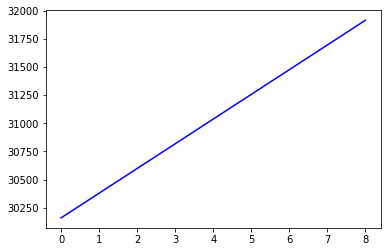

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(mid, color='blue')
plt.show()